In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/kifiya ai/Solar-radiation-measurement/src/togo-dapaong_qc.csv"  
data = pd.read_csv(file_path)


In [3]:
# 1. Summary Statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%         0

In [4]:
# 2. Data Quality Check
print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nChecking for negative values in GHI, DNI, and DHI:")
negative_values = data[(data['GHI'] < 0) | (data['DNI'] < 0) | (data['DHI'] < 0)]
print(negative_values)



Checking for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Checking for negative values in GHI, DNI, and DHI:
               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0

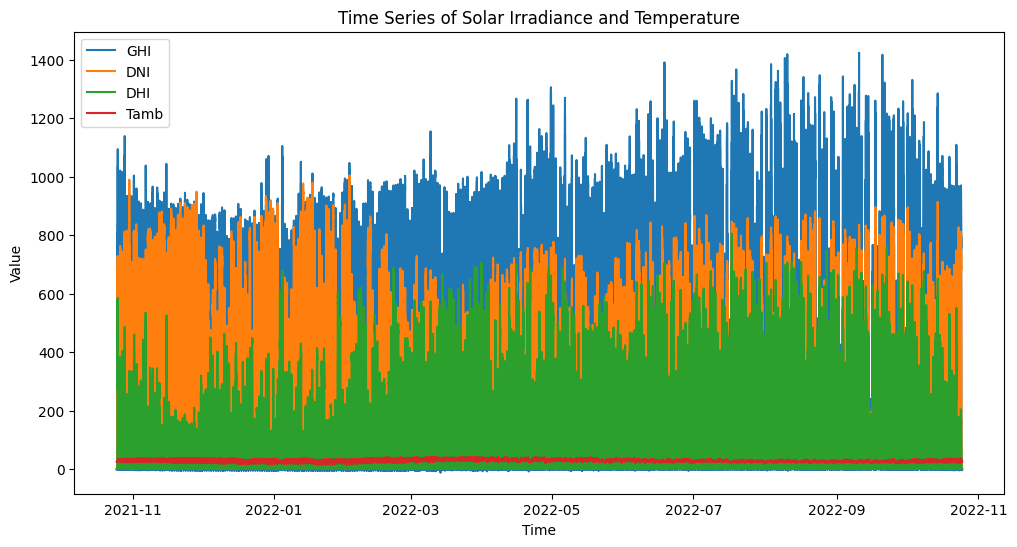

In [5]:

# 3. Time Series Analysis
# Convert the 'Timestamp' column to a datetime object
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Plotting GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 6))
for column in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(data['Timestamp'], data[column], label=column)
plt.legend()
plt.title("Time Series of Solar Irradiance and Temperature")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

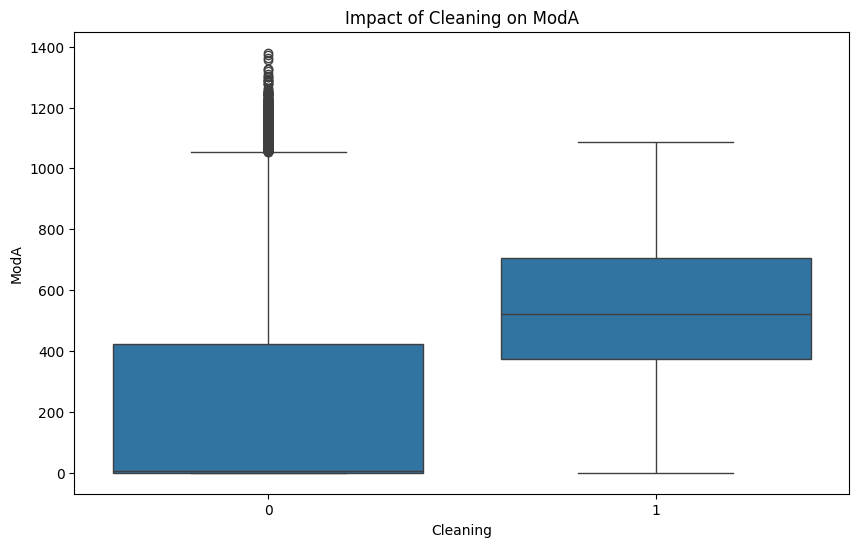

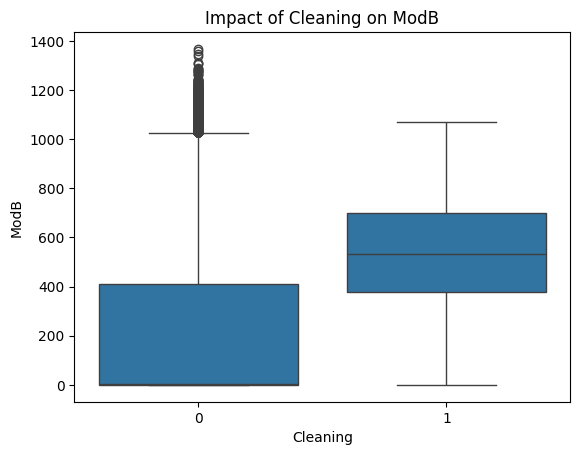

In [6]:
# 4. Impact of Cleaning on Sensor Readings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cleaning', y='ModA', data=data)
plt.title("Impact of Cleaning on ModA")
plt.show()

sns.boxplot(x='Cleaning', y='ModB', data=data)
plt.title("Impact of Cleaning on ModB")
plt.show()

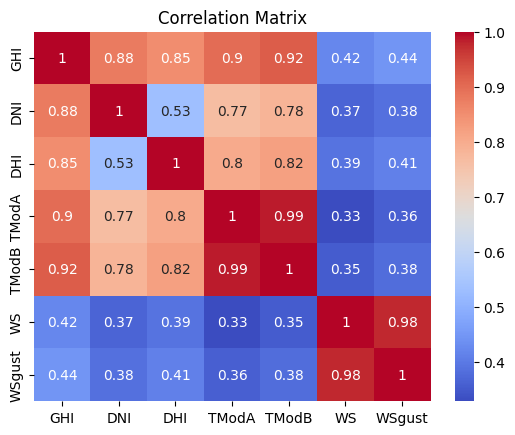

In [7]:
# 5. Correlation Analysis
correlation_matrix = data[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 800x800 with 0 Axes>

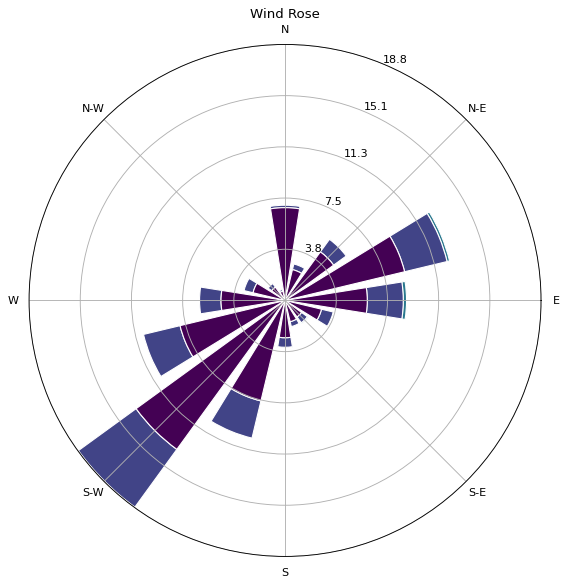

In [8]:
# 6. Wind Analysis (Wind Roses)
from windrose import WindroseAxes

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose")
plt.show()


c:\kifiya ai\Solar-radiation-measurement\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


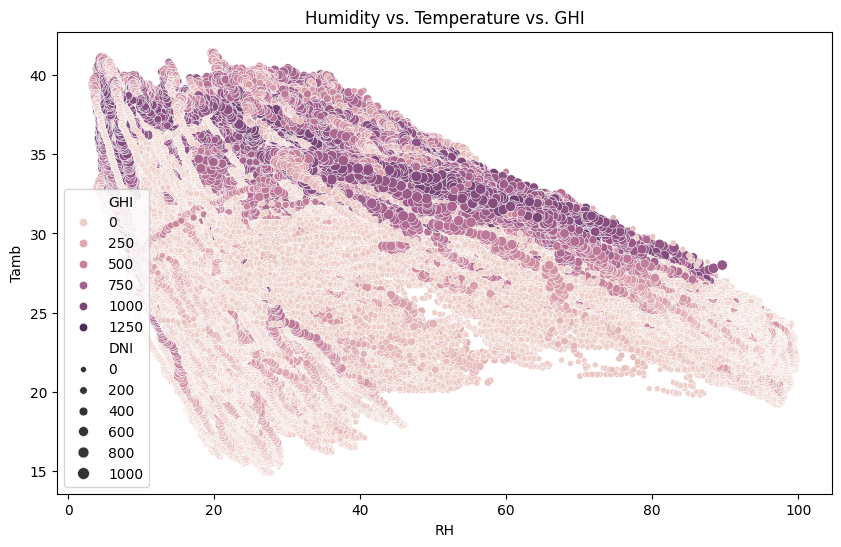

In [9]:
# 7. Temperature Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='DNI', data=data)
plt.title("Humidity vs. Temperature vs. GHI")
plt.show()

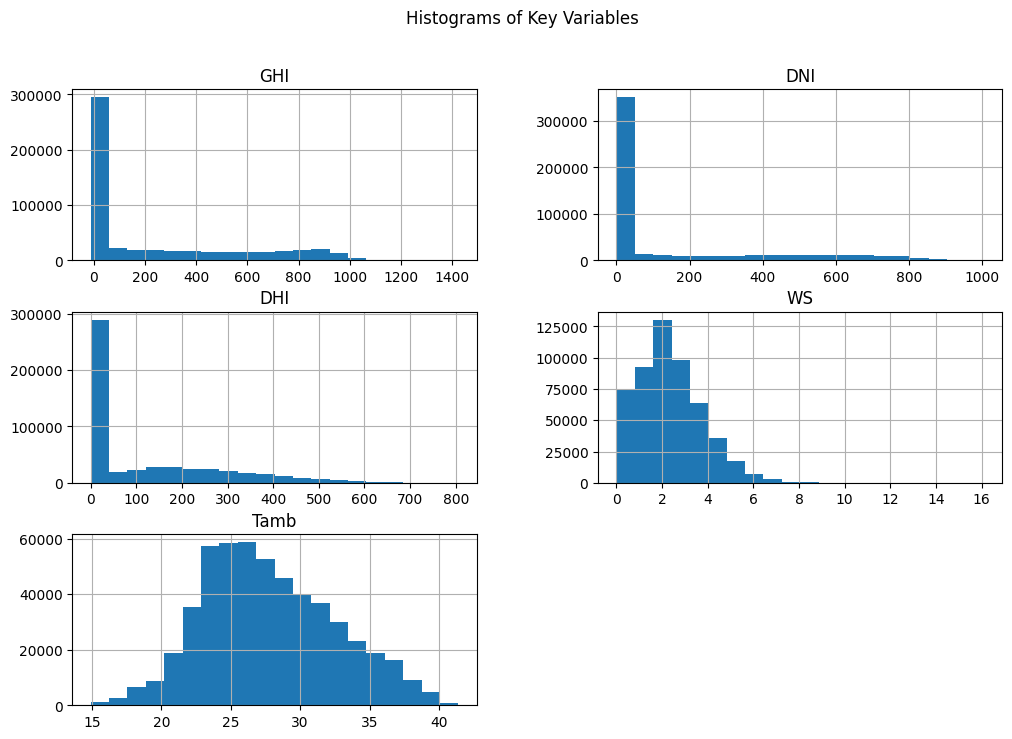

In [10]:
# 8. Histograms
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
data[columns_to_plot].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Key Variables")
plt.show()


In [11]:
# 9. Z-Score Analysis
from scipy.stats import zscore

z_scores = data[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("\nOutliers Detected:")
print(data[outliers])


Outliers Detected:
                 Timestamp    GHI   DNI    DHI   ModA   ModB  Tamb    RH   WS  \
5411   2021-10-28 18:12:00   -1.0   0.0    0.0    0.0    0.0  29.3  62.4  6.9   
5413   2021-10-28 18:14:00   -0.8   0.0    0.0    0.0    0.0  28.6  63.7  7.1   
5425   2021-10-28 18:26:00   -1.3   0.0    0.0    0.0    0.0  27.3  65.0  6.9   
5429   2021-10-28 18:30:00   -1.3   0.0    0.0    0.0    0.0  27.1  65.2  6.9   
5432   2021-10-28 18:33:00   -1.4   0.0    0.0    0.0    0.0  26.9  65.6  6.9   
...                    ...    ...   ...    ...    ...    ...   ...   ...  ...   
510473 2022-10-14 11:54:00  709.5  63.7  629.8  703.1  694.9  30.2  66.6  3.5   
510474 2022-10-14 11:55:00  677.8  40.6  621.7  670.1  662.2  30.2  66.7  2.8   
510475 2022-10-14 11:56:00  659.5  29.7  614.9  651.0  643.4  30.3  66.1  4.1   
510476 2022-10-14 11:57:00  660.1  40.7  605.6  653.2  645.6  30.2  66.0  3.7   
510477 2022-10-14 11:58:00  655.8  50.2  591.0  647.5  639.9  30.2  66.2  3.4   

       

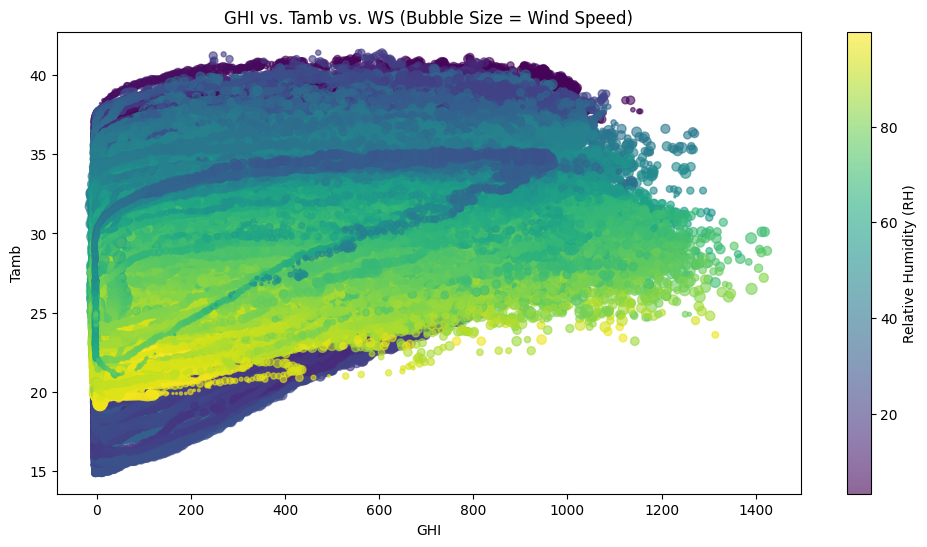

In [12]:

# 10. Bubble Chart
plt.figure(figsize=(12, 6))
bubble_chart = plt.scatter(data['GHI'], data['Tamb'], s=data['WS']*10, c=data['RH'], cmap='viridis', alpha=0.6)
plt.colorbar(bubble_chart, label='Relative Humidity (RH)')
plt.title("GHI vs. Tamb vs. WS (Bubble Size = Wind Speed)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.show()

In [ ]:
# 11. Data Cleaning
# Dropping rows with null timestamps
data_cleaned = data.dropna(subset=['Timestamp'])

# Handling missing or negative values
data_cleaned = data_cleaned[(data_cleaned['GHI'] >= 0) & (data_cleaned['DNI'] >= 0) & (data_cleaned['DHI'] >= 0)]

# Dropping unused or null-filled columns
data_cleaned = data_cleaned.drop(columns=['Comments'])

print("\nCleaned Data Summary:")
print(data_cleaned.info())

data_cleaned.to_csv("../src/data/cleaned_data/cleaned_data_for_togo_analysis.csv", index=False)